# Flight Ticket Price Prediction

I performed a detailed analysis on various flight-related factors to predict flight ticket prices. The factors included flight duration, departure and arrival times, date of journey, total stops, additional information, airline, source and destination, and route.

After conducting exploratory data analysis and feature engineering, I built and evaluated two machine learning models: linear regression and random forest. The linear regression model helped me understand the relationships between the predictor variables and the target variable (ticket price), while the random forest model was able to capture non-linear relationships and interactions between the variables.

Using these models, I was able to accurately predict flight ticket prices based on the input variables. This analysis can be useful for airlines, travel agencies, and customers to plan and book their flights in a more informed and cost-effective way.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r"E:\FlightFarePrediction\notebooks\data\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape

(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.isnull().sum()  #df.isna()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df[df['Route'].isnull() | df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.duplicated().sum()

220

In [11]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis & Feature engineering:

### Duration

### Departure and Arrival Time

### Date of journey

### Total stops

### Additional info 

### Airline

### Source and destination

### Route

## Duration

In [12]:
def convert_duration(Duration):
        if len(Duration.split()) == 2:
            hours = int(Duration.split()[0][: -1])
            minutes = int(Duration.split()[1][: -1])
            return hours * 60 + minutes
        else:
            return int(Duration[: -1]) * 60

In [13]:
df['Duration'] = df['Duration'].apply(convert_duration)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


## DEPARTURE AND ARRIVAL TIME

In [14]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                    int64
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
df['Dep_Time_in_hours'] = df['Dep_Time'].dt.hour
df['Dep_Time_in_minutes'] = df['Dep_Time'].dt.minute
df['Arrival_Time_in_Hours'] = df['Arrival_Time'].dt.hour
df['Arrival_Time_in_minutes'] = df['Arrival_Time'].dt.minute

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-05-22 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-22 05:50:00,2024-05-22 13:15:00,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2024-05-22 09:25:00,2024-06-10 04:25:00,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-05-22 18:05:00,2024-05-22 23:30:00,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-05-22 16:50:00,2024-05-22 21:35:00,285,1 stop,No info,13302,16,50,21,35


In [16]:
df.drop(['Dep_Time','Arrival_Time'], axis = 1, inplace = True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


## Date of journey

In [17]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [18]:
df['Date_of_Journey'].dt.year.unique()

array([2019])

In [19]:
df['Day'] = df['Date_of_Journey'].dt.day
df['month'] = df['Date_of_Journey'].dt.month

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


In [20]:
df.drop('Date_of_Journey',axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,1,3


## TOTAL STOPS

In [21]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [22]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4})

In [23]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,1,3


## ADDITIONAL INFO

In [24]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [25]:
df.drop('Additional_Info',axis=1, inplace=True)

In [26]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3


In [27]:
df.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

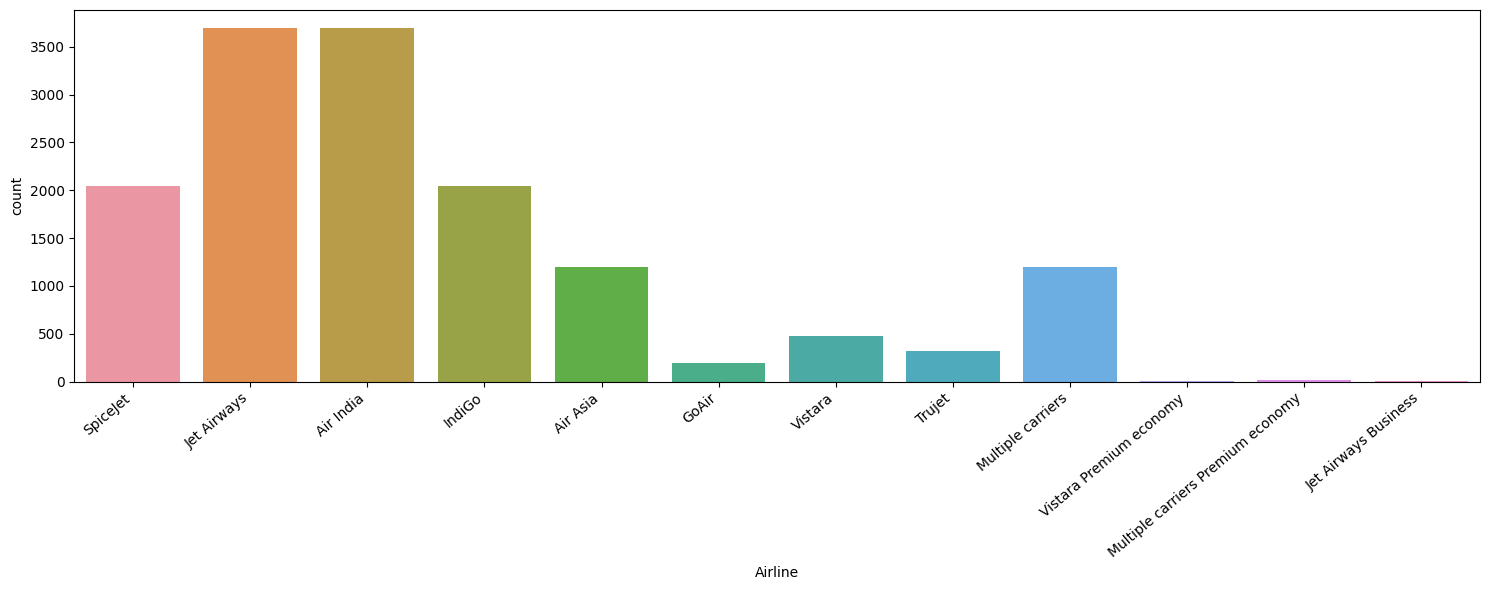

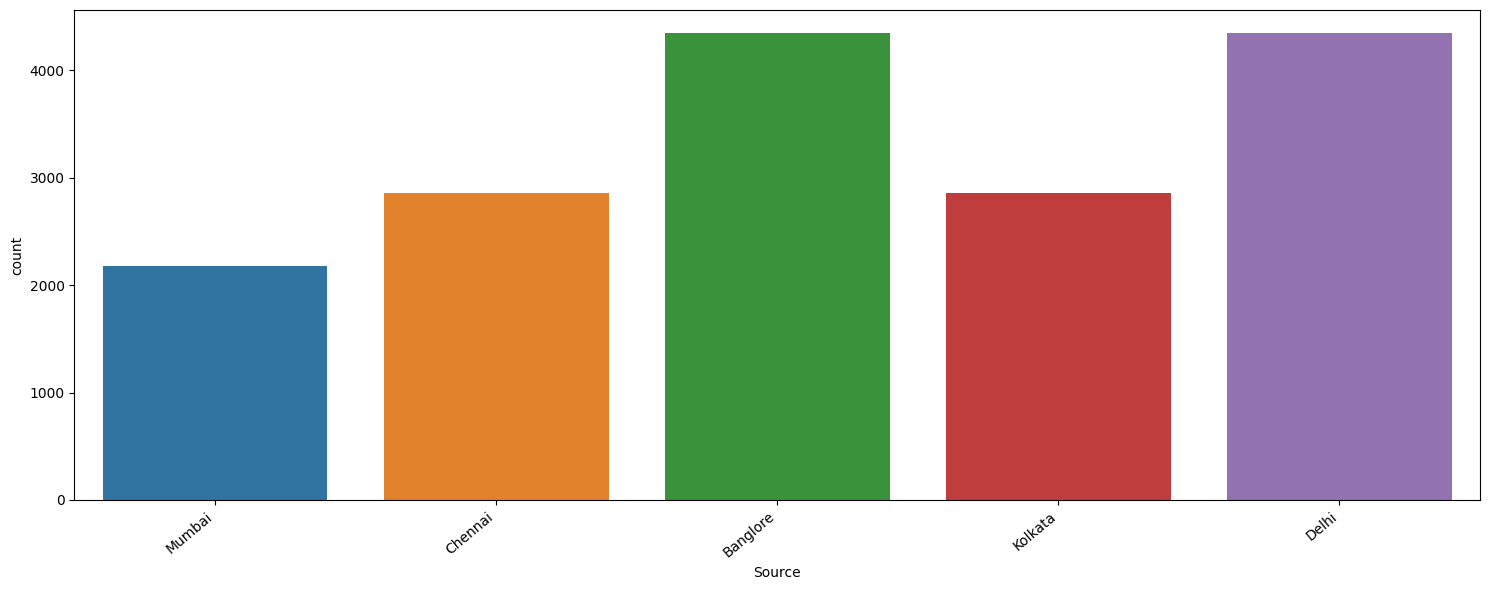

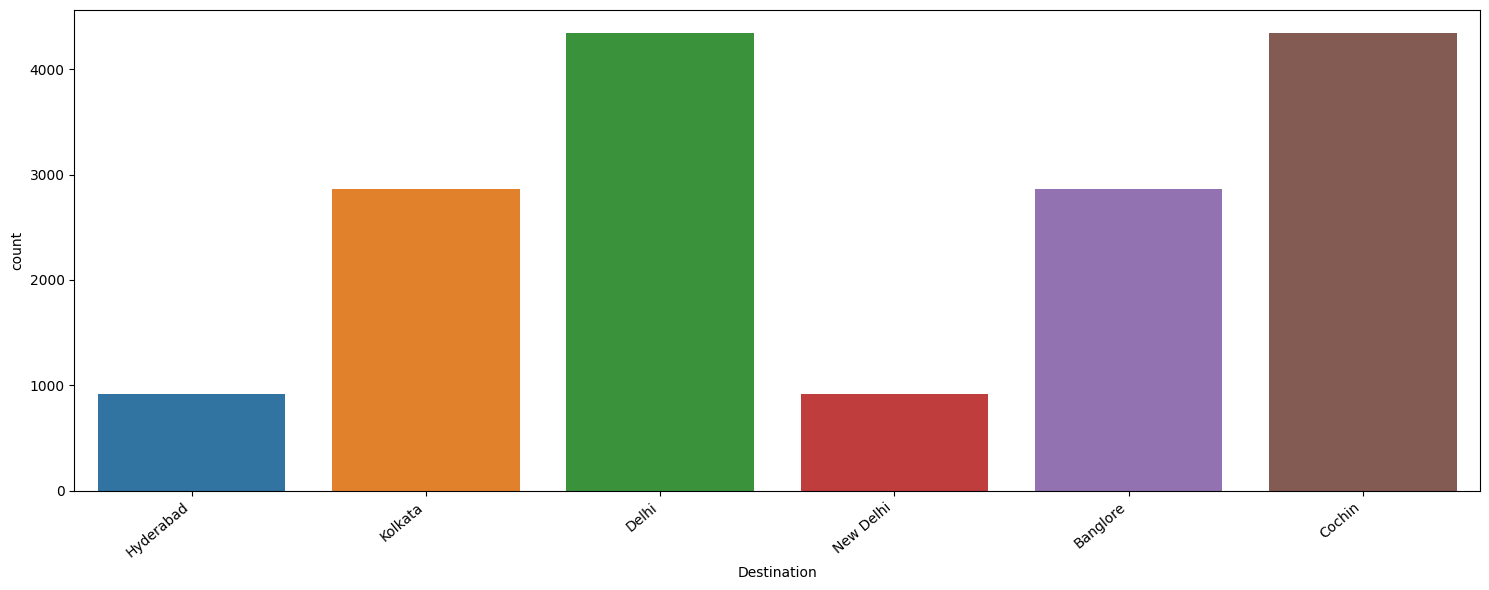

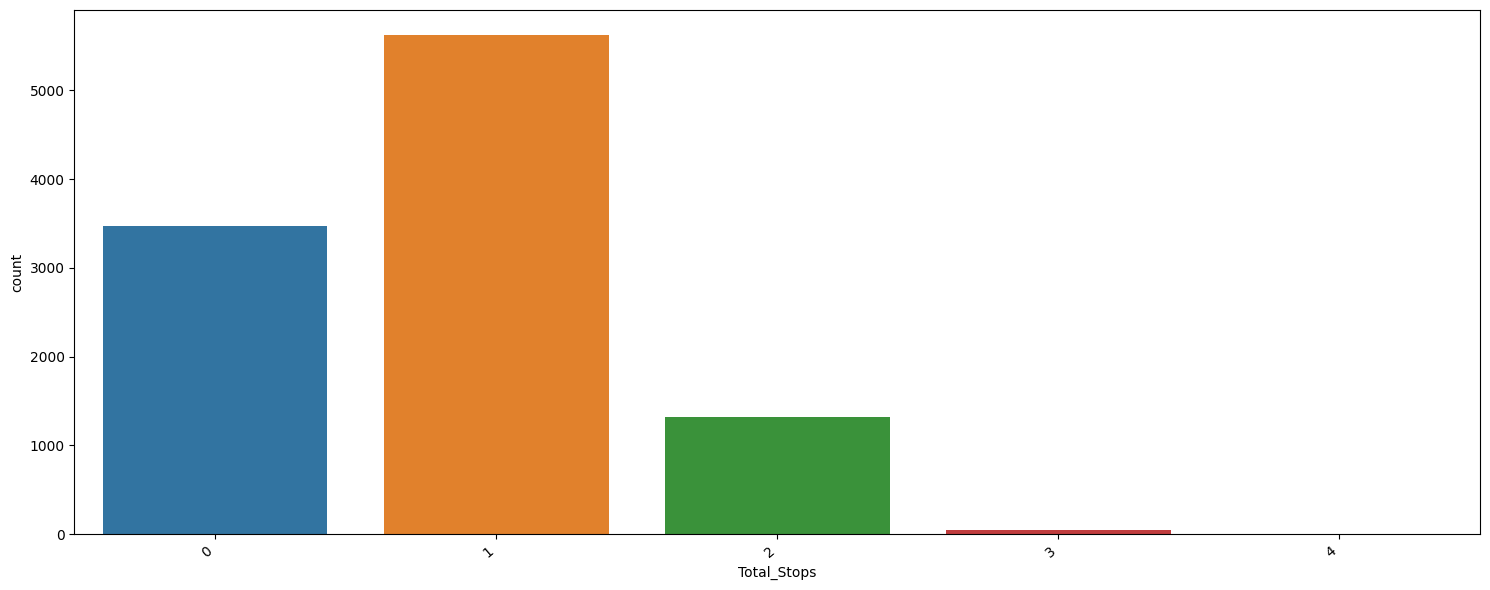

In [28]:
for i in ['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize=(15,6))
    sb.countplot(data = df, x = i)
    ax = sb.countplot(x = i,data = df.sort_values('Price', ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
    plt.tight_layout()
    plt.show()
    print('\n\n')

## AIRLINE

In [29]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

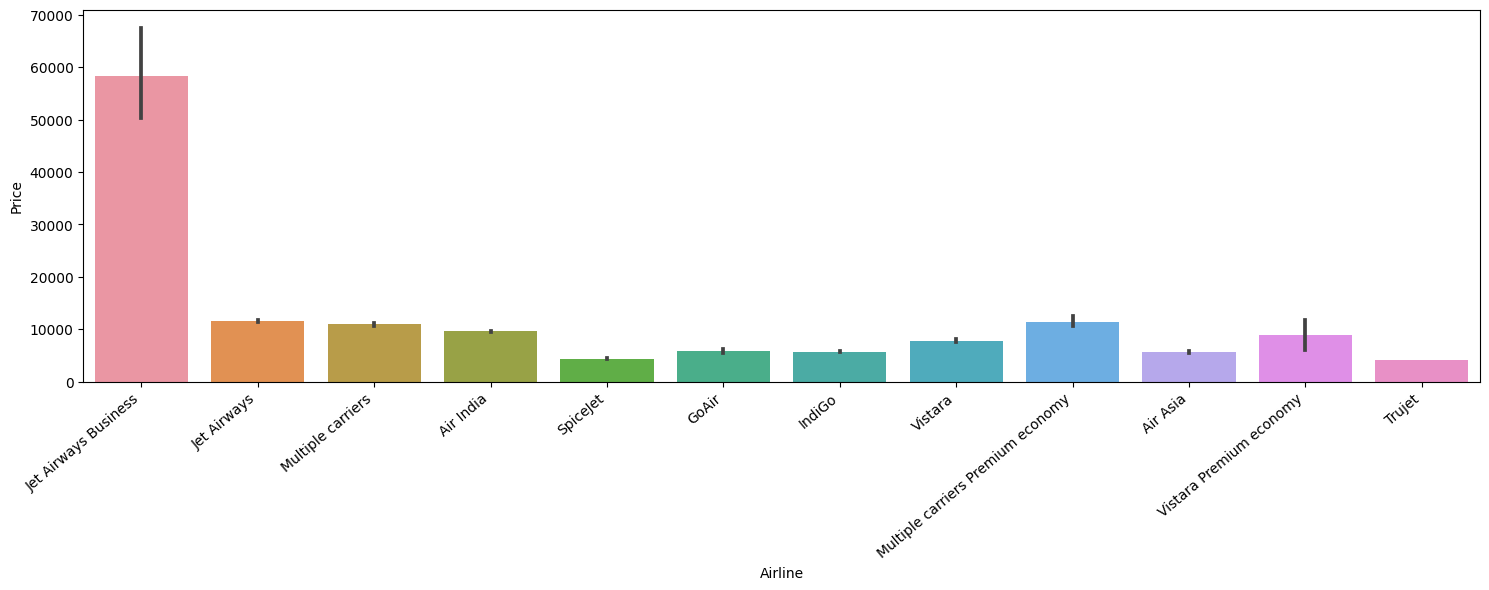

In [30]:
plt.figure(figsize=(15,6))
ax = sb.barplot(x = 'Airline',y = 'Price',data=df.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

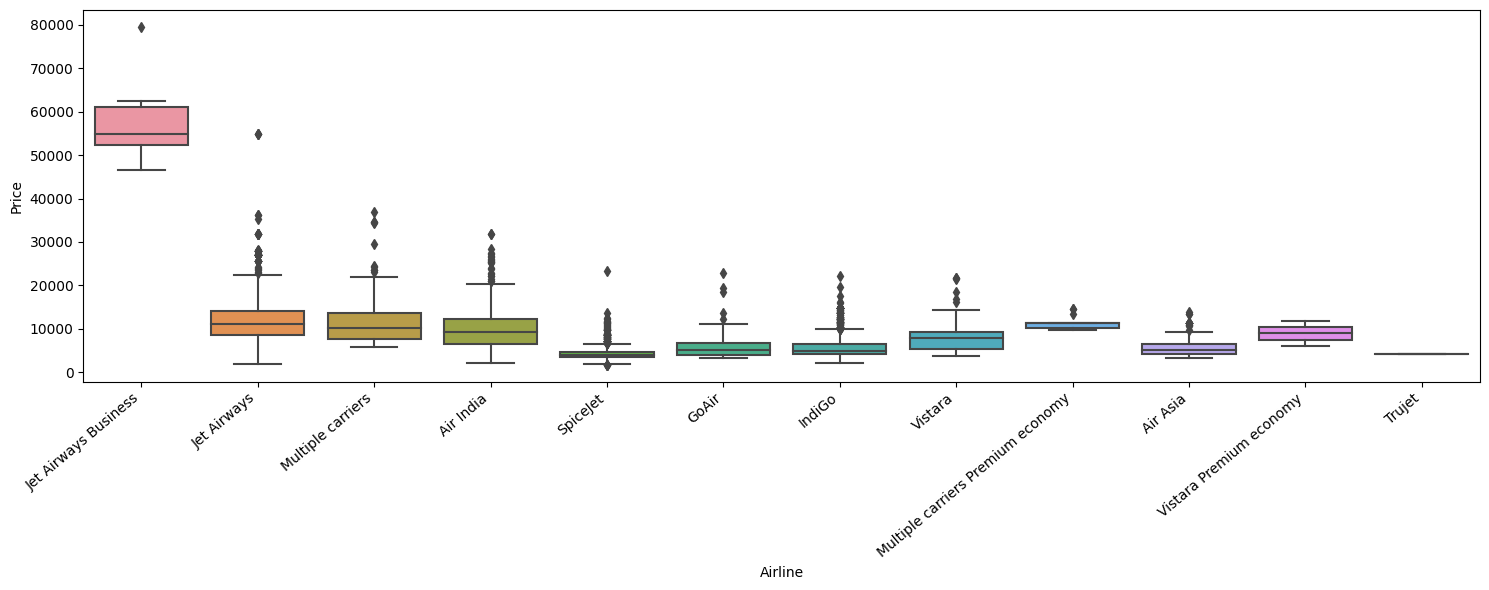

In [31]:
plt.figure(figsize=(15,6))
ax = sb.boxplot(x = 'Airline',y = 'Price',data=df.sort_values('Price',ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right')
plt.tight_layout()
plt.show()

In [32]:
df.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.00,54747.0,61122.50,79512.0
Jet Airways,3700.0,11599.021081,4315.671402,1840.0,8586.00,11134.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.00,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.00,10197.0,13587.00,36983.0
Air India,1694.0,9556.608028,3937.875634,2050.0,6597.75,9316.0,12199.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.00,9125.0,10459.00,11793.0
Vistara,478.0,7801.355649,2915.288625,3687.0,5403.00,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.00,5135.0,6811.25,22794.0
IndiGo,2043.0,5668.469897,2266.933697,2227.0,4226.00,5000.0,6493.00,22153.0


In [33]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [34]:
df = pd.concat([df,Airline],axis=1)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,False,True,False,False,False,False,False,False,False,False
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,False,False,False,False,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,False,False,True,False,False,False,False,False,False,False
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,False,True,False,False,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,False,True,False,False,False,False,False,False,False,False


In [35]:
df.drop('Airline',axis=1,inplace=True)
df.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,False,True,False,False,False,False,False,False,False,False
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,False,False,False,False,False,False,False,False,False,False
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,False,False,True,False,False,False,False,False,False,False
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,False,True,False,False,False,False,False,False,False,False
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,False,True,False,False,False,False,False,False,False,False


## SOURCE AND DESTINATION

In [36]:
list1 = ['Source','Destination']
for i in list1:
    print(df[i].value_counts(),'\n') 

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64 



In [37]:
df = pd.get_dummies(data = df,columns = list1,drop_first=True)
df.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,False,False,False,False,False,False,False,False,False,True
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,False,False,False,True,False,False,False,False,False,False
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,False,False,True,False,False,True,False,False,False,False
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,False,False,False,True,False,False,False,False,False,False
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,False,False,False,False,False,False,False,False,False,True


## ROUTE

In [38]:
route = df[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [39]:
df['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

In [40]:
route['Route_1'] = route['Route'].str.split('→').str[0]
route['Route_2'] = route['Route'].str.split('→').str[1]
route['Route_3'] = route['Route'].str.split('→').str[2]
route['Route_4'] = route['Route'].str.split('→').str[3]
route['Route_5'] = route['Route'].str.split('→').str[4]
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [41]:
route.fillna('None',inplace=True)
route.head()

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in range(1,6):
    col ='Route_' + str(i)
    route[col] = le.fit_transform(route[col])

route.head()


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [43]:
route.drop('Route',axis=1,inplace = True)
route.head()

,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,13,29,13,5
1,2,25,1,3,5
2,3,32,4,5,5
3,2,34,3,13,5
4,0,34,8,13,5


In [44]:
df = pd.concat([df,route],axis=1)
df.head()

,Route,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,False,False,False,False,True,0,13,29,13,5
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,1,5,...,False,False,False,False,False,2,25,1,3,5
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,9,6,...,True,False,False,False,False,3,32,4,5,5
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,12,5,...,False,False,False,False,False,2,34,3,13,5
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,1,3,...,False,False,False,False,True,0,34,8,13,5


In [45]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Duration,Total_Stops,Price,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,False,...,False,False,False,False,True,0,13,29,13,5
1,445,2,7662,5,50,13,15,1,5,True,...,False,False,False,False,False,2,25,1,3,5
2,1140,2,13882,9,25,4,25,9,6,False,...,True,False,False,False,False,3,32,4,5,5
3,325,1,6218,18,5,23,30,12,5,False,...,False,False,False,False,False,2,34,3,13,5
4,285,1,13302,16,50,21,35,1,3,False,...,False,False,False,False,True,0,34,8,13,5


# Building the Machine Learning Models and Evaluatiing them

In [46]:
temp_col = df.columns.to_list()
print(temp_col,'\n')

new_col = temp_col[:2]+temp_col[3:]
new_col.append(temp_col[2])
print(new_col,'\n')

df = df.reindex(columns=new_col)
df.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_Hours', 'Arrival_Time_in_minutes', 'Day', 'month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_Hours', 'Arrival_Time_in_minutes', 'Day', 'month', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 

,Duration,Total_Stops,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_Hours,Arrival_Time_in_minutes,Day,month,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,False,False,...,False,False,False,True,0,13,29,13,5,3897
1,445,2,5,50,13,15,1,5,True,False,...,False,False,False,False,2,25,1,3,5,7662
2,1140,2,9,25,4,25,9,6,False,False,...,False,False,False,False,3,32,4,5,5,13882
3,325,1,18,5,23,30,12,5,False,False,...,False,False,False,False,2,34,3,13,5,6218
4,285,1,16,50,21,35,1,3,False,False,...,False,False,False,True,0,34,8,13,5,13302


In [47]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

df = scaler.fit_transform(df)

df[0]

array([-0.91842886, -1.21459253,  1.66257786, -0.2341234 , -1.8070449 ,
       -0.88836709,  1.24444197, -1.46208011, -0.43954813, -0.13745417,
        2.03000016, -0.73971305, -0.02395482, -0.35926875, -0.03527234,
       -0.29065826, -0.00977718, -0.21880723, -0.01693618, -0.19440645,
       -0.84280218, -0.61336513, -0.26716543, -0.84280218, -0.3708704 ,
       -0.26716543, -0.19440645,  3.23208748, -1.65893317,  0.15514925,
        1.37855668,  0.38204424,  0.06338059, -1.10923294])

In [48]:
from sklearn.model_selection import train_test_split as tts

x = df[: , : -1]
y = df[: , -1]

In [49]:
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7323, 33)
(3139, 33)
(7323,)
(3139,)


## LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

# Predictions
y_pred_linear = linear_reg_model.predict(x_test)

# Evaluation
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

print("Linear Regression Results:")
print("R-squared:", linear_r2)
print("Mean Squared Error:", linear_mse)

Linear Regression Results:
R-squared: -1.573383674284556e+23
Mean Squared Error: 1.5278754292895664e+23


## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)

y_pred_ridge = ridge_model.predict(x_test)

ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("R-squared:", ridge_r2)
print("Mean Squared Error:", ridge_mse)

Ridge Regression Results:
R-squared: 0.6181385374677051
Mean Squared Error: 0.37081657546813585


## RandomForsestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x_train, y_train)

y_pred_rf = random_forest_model.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print("\nRandom Forest Results:")
print("R-squared:", rf_r2)
print("Mean Squared Error:", rf_mse)


Random Forest Results:
R-squared: 0.8200323206328874
Mean Squared Error: 0.17476232902715658


## Support Vector Regression

In [53]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

y_pred_svr = svr_model.predict(x_test)

svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)

print("Support Vector Regression (SVR) Results:")
print("R-squared:", svr_r2)
print("Mean Squared Error:", svr_mse)

Support Vector Regression (SVR) Results:
R-squared: 0.7379459356188531
Mean Squared Error: 0.2544744633221664


## GradientBoostingRegressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor


gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(x_train, y_train)

y_pred_gb = gradient_boosting_model.predict(x_test)

gb_r2 = r2_score(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)

print("Gradient Boosting Regression Results:")
print("R-squared:", gb_r2)
print("Mean Squared Error:", gb_mse)

Gradient Boosting Regression Results:
R-squared: 0.7748410509173609
Mean Squared Error: 0.2186464952005138


## KNeighborsRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Regression Results:")
print("R-squared:", knn_r2)
print("Mean Squared Error:", knn_mse)

K-Nearest Neighbors (KNN) Regression Results:
R-squared: 0.7618338421970685
Mean Squared Error: 0.23127748593226427


## GridSearch with Rf model

In [56]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Using negative MSE as the scoring metric
                           cv=5)  # 5-fold cross-validation


grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(x_test)
best_r2 = r2_score(y_test, y_pred_best)
best_mse = mean_squared_error(y_test, y_pred_best)

print("Best Random Forest Model Results:")
print("Best Hyperparameters:", best_params)
print("R-squared:", best_r2)
print("Mean Squared Error:", best_mse)

Best Random Forest Model Results:
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
R-squared: 0.8347759269980473
Mean Squared Error: 0.16044516388008073
